In [1]:
import pandas as pd
import os
import seaborn
from datetime import datetime
import time
import math
import matplotlib.pyplot as plt

In [2]:
record_df = pd.DataFrame()
user_df = pd.DataFrame()

for filename in os.listdir("out"):
    if filename.startswith("compiled_records"):
        record_df = pd.concat([record_df, pd.read_csv("out/"+filename, index_col=[0])], ignore_index=True)
    elif filename.startswith("compiled_user"):
        user_df = pd.concat([user_df, pd.read_csv("out/"+filename, index_col=[0])], ignore_index=True)
    else:
        print("Invalid file",filename,"-- skipping.")

# record_df = pd.read_csv("out/compiled_records_cohorts_13-353.csv", index_col=[0])
# user_df = pd.read_csv("out/compiled_user_info_cohorts_13-353.csv", index_col=[0])

Invalid file user_leaderboard_1730705078.csv -- skipping.


In [3]:
# construct more attributes
record_df["kps"] = record_df["inputs"] / record_df["final_time"] # keys per second
record_df["kpp"] = record_df["inputs"] / record_df["pieces_placed"] # keys per piece
record_df["percent_perf"] = record_df["finesse_perf"] / record_df["pieces_placed"] # percent of pieces placed with perfect finesse
# TODO figure out how the finesse percentage is calcualted

In [4]:
def calcTimePlayed(x):
    if x and isinstance(x, str):
        return time.time() - datetime.fromisoformat(x).timestamp()
    else:
        return math.nan
    
user_df["time_played"] = user_df["created_date"].apply(calcTimePlayed) # time since account creation

In [9]:
record_df.loc[record_df["finesse_faults"] > 8000]

,record_id,user_id,datetime,current_pb,once_pb,final_time,pps,inputs,score,pieces_placed,singles,doubles,triples,quads,all_clears,finesse_faults,finesse_perf,kps,kpp,percent_perf
8453236,6695edec831a250b8712f022,6420d1e9788f9a7a605250e6,2023-07-08T01:04:34.438Z,False,False,1204620.0,0.103767,12875,8670,125,35,2,0,0,0,10477.0,52.0,0.010688,103.0,0.416


In [10]:
crazy_outlier = record_df.loc[record_df["finesse_faults"] > 8000].index
record_df.drop(crazy_outlier, inplace=True)

In [11]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839803 entries, 0 to 839802
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  839803 non-null  object 
 1   username            839802 non-null  object 
 2   rank                839803 non-null  int64  
 3   cohort              839803 non-null  int64  
 4   best_time           839803 non-null  float64
 5   best_record         839803 non-null  object 
 6   country             817771 non-null  object 
 7   created_date        839768 non-null  object 
 8   xp                  839803 non-null  float64
 9   achievement_rating  839803 non-null  int64  
 10  TL_games_played     839803 non-null  int64  
 11  TL_games_won        839803 non-null  int64  
 12  TL_play_time        839803 non-null  float64
 13  num_records         839803 non-null  int64  
 14  time_played         839768 non-null  float64
dtypes: float64(4), int64(6), object(5)

In [12]:
record_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072731 entries, 0 to 12072731
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   record_id       object 
 1   user_id         object 
 2   datetime        object 
 3   current_pb      bool   
 4   once_pb         bool   
 5   final_time      float64
 6   pps             float64
 7   inputs          int64  
 8   score           int64  
 9   pieces_placed   int64  
 10  singles         int64  
 11  doubles         int64  
 12  triples         int64  
 13  quads           int64  
 14  all_clears      int64  
 15  finesse_faults  float64
 16  finesse_perf    float64
 17  kps             float64
 18  kpp             float64
 19  percent_perf    float64
dtypes: bool(2), float64(7), int64(8), object(3)
memory usage: 1.7+ GB


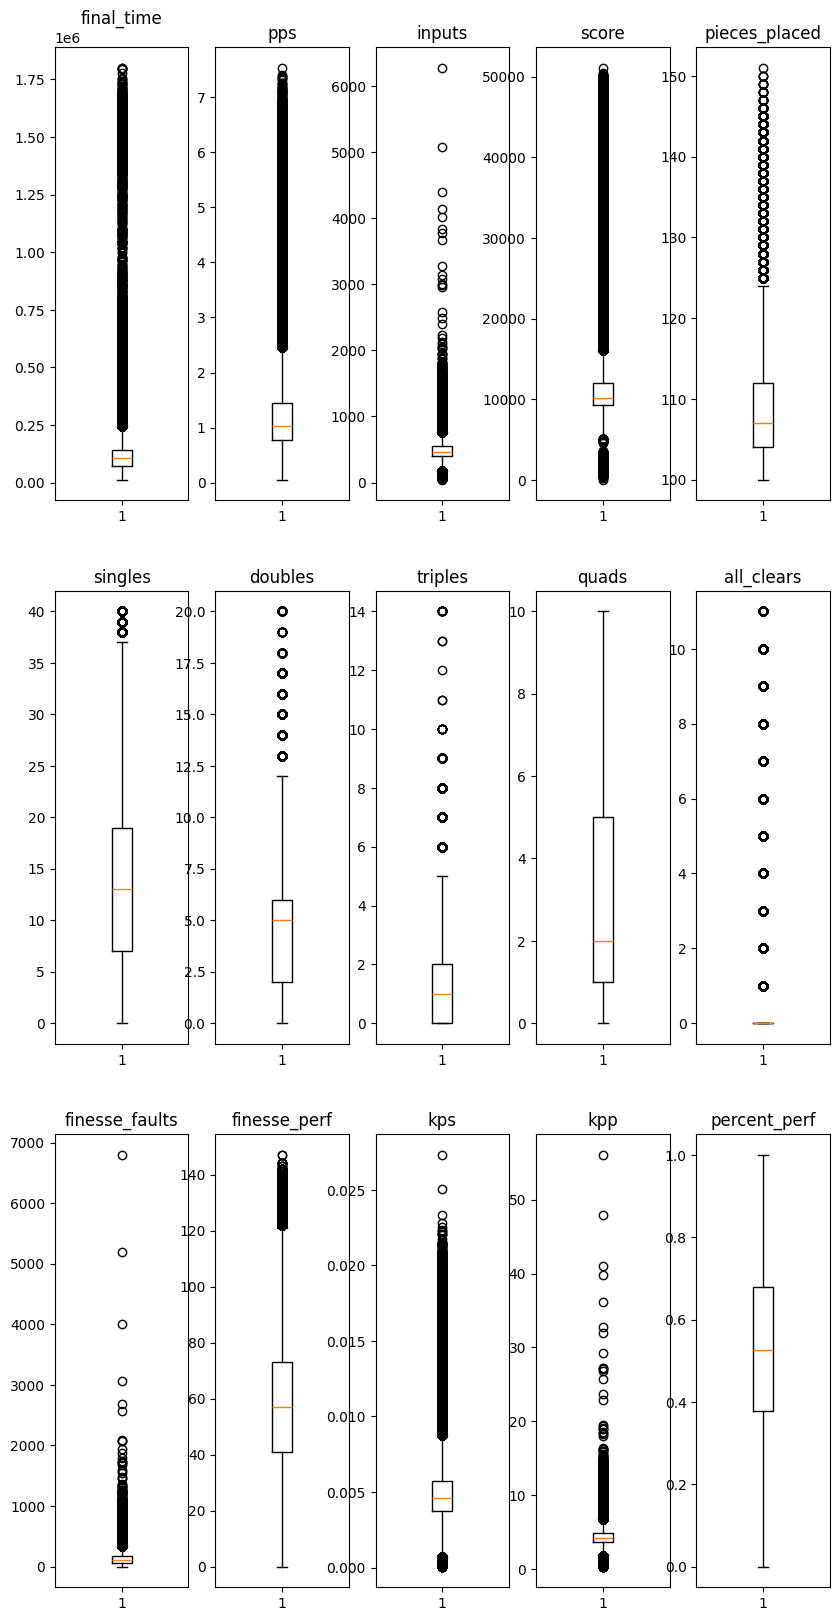

In [13]:
figure, axis = plt.subplots(3, 5, figsize=(10,20))

for i in range(3):
    for j in range(5):
        axis[i][j].boxplot(record_df.iloc[:,[(i*5)+j+5]].dropna())
        axis[i][j].set_title(record_df.columns[(i*5)+j+5])

# record_df.loc[:, ["finesse_faults"]].boxplot()

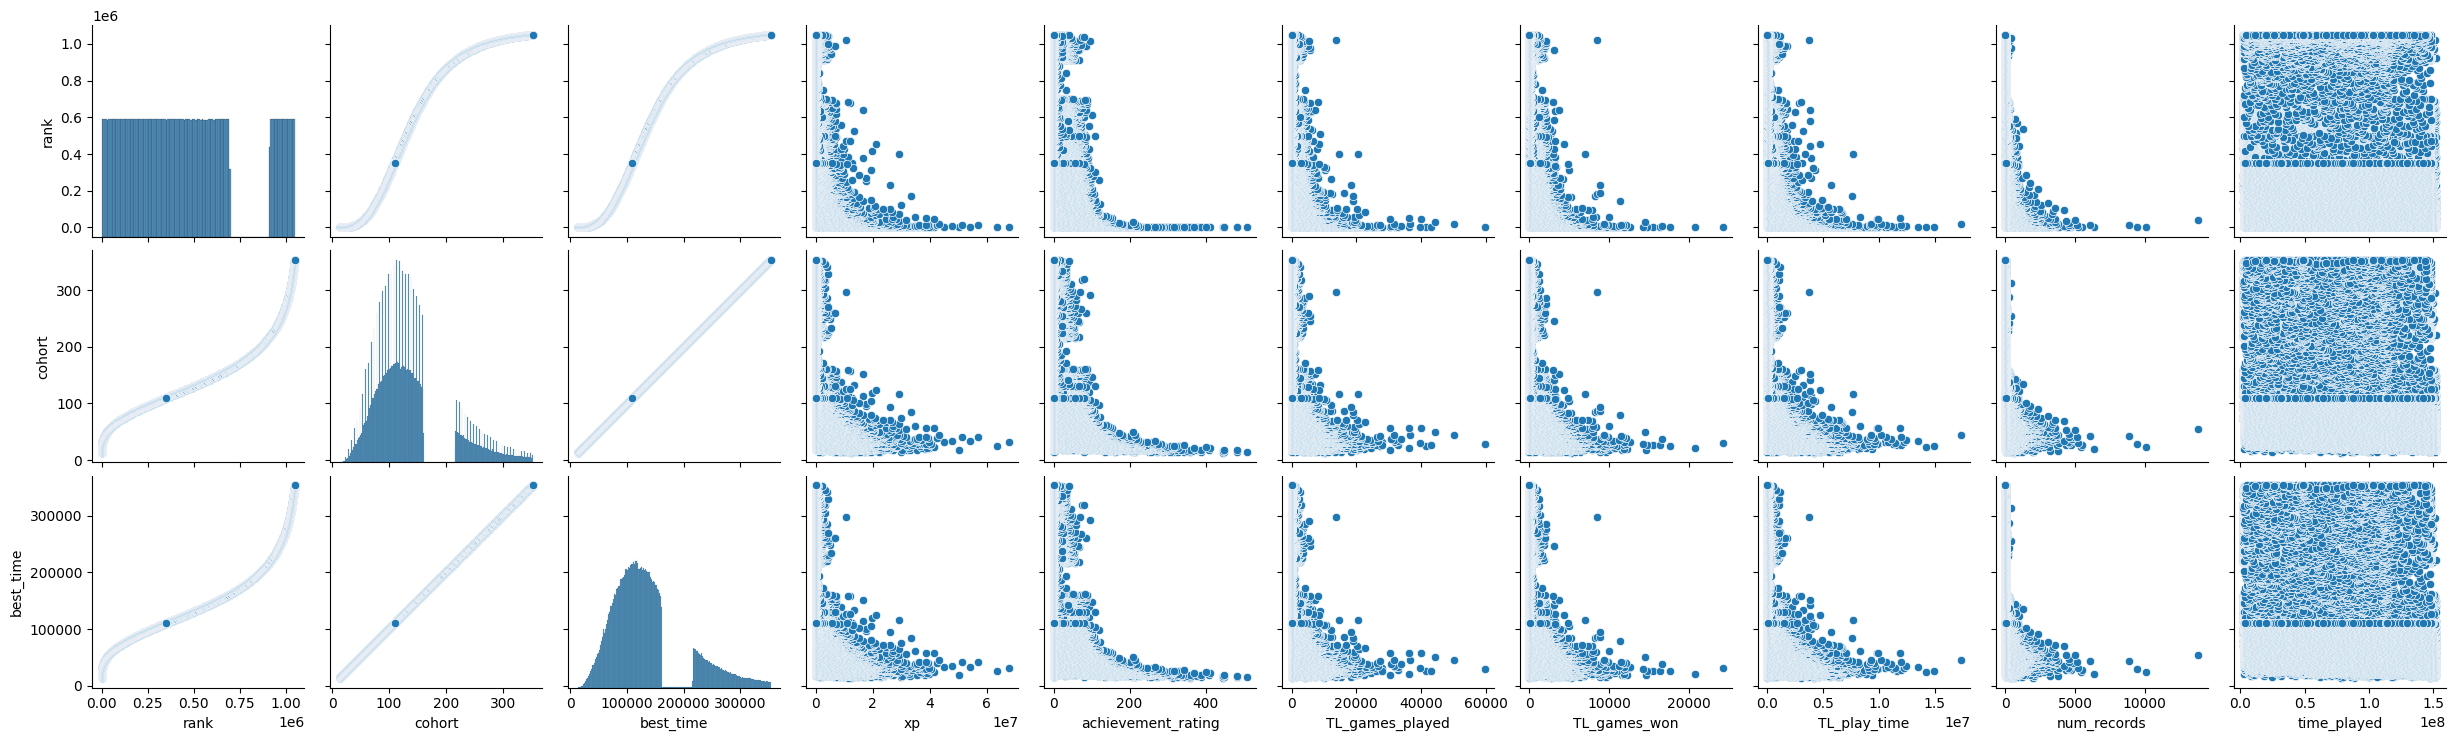

In [14]:
seaborn.pairplot(user_df, y_vars=["rank", "cohort", "best_time"])

[Text(0.5, 1.0, 'Correlation between user attributes')]

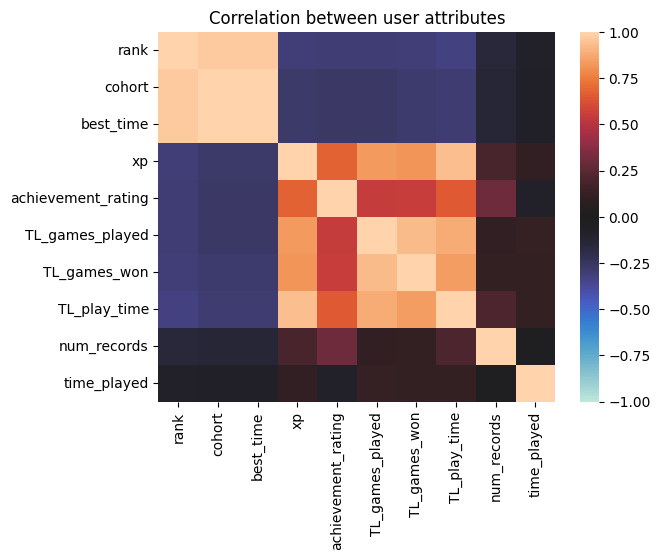

In [15]:
seaborn.heatmap(user_df.corr(numeric_only=True), cmap="icefire", center=0, vmin=-1, vmax=1).set(title="Correlation between user attributes")

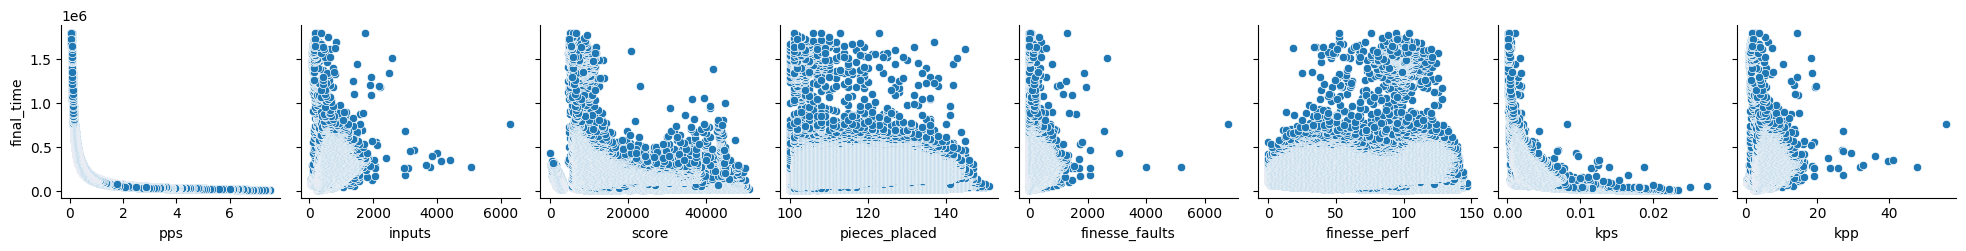

In [16]:
seaborn.pairplot(record_df, y_vars=["final_time"], x_vars=["pps", "inputs", "score", "pieces_placed", "finesse_faults", "finesse_perf", "kps", "kpp"])

[Text(0.5, 1.0, 'Correlation between record attributes')]

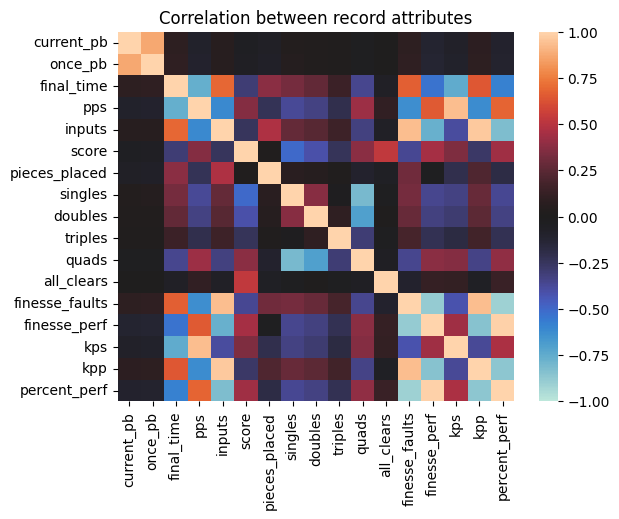

In [17]:
seaborn.heatmap(record_df.corr(numeric_only=True), cmap="icefire", center=0, vmin=-1, vmax=1).set(title="Correlation between record attributes")